In [1]:
from migdalcalc import migdalcalc as mc
import matplotlib.pyplot as plt
import numpy as np
from migdalcalc.migdal import quench
from migdalcalc.migdal import ionization as ion
from migdalcalc.migdal import kinematics as kin

In [2]:
Si_migdal = mc.migdalcalc(target="Si-28", nuclear_data_name="jeff33")

{'jendl40': ['data/Si/nuclear/Si28_SIG_jendl40.json', 'data/Si/nuclear/Si28_DA_jendl40.txt'], 'jeff33': ['data/Si/nuclear/Si28_SIG_jeff33.json', 'data/Si/nuclear/Si28_DA_jeff33.txt']}


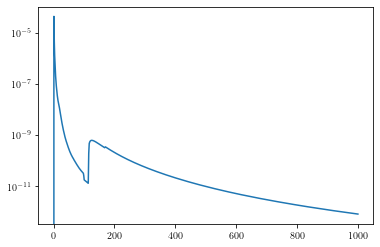

In [3]:
angle = 13 #13 deg
c = np.cos(angle*np.pi/180)
En = 54*1e3 #54 keV
YL = lambda E: quench.Lindhard_Factor(E, 14, 28)
YS = lambda E: quench.Y_Si_sarkis(E)
Si_ionization_spectrum = Si_migdal.dR_dEion(c, En, YS, "elf-ibe")

E_ion_range = np.geomspace(1e-3, 1e3, 1000)

plt.plot(E_ion_range, Si_ionization_spectrum(E_ion_range))
plt.yscale('log')
plt.show()

In [4]:
A = Si_migdal.A
N_per_g = (6.02e23/A)
barns_to_cm2 = 1e-24
flux = 1e3 #nuetrons/cm^2/second
seconds_to_days = 60*60*24 #seconds to days
phi_int = 2*np.pi #integral over phi
     
xsec_to_rate = flux*N_per_g*barns_to_cm2*seconds_to_days*phi_int

elastic_spectrum = Si_migdal.nuc.dSig_dOmega(En)
elastic_rate = xsec_to_rate*elastic_spectrum(c)

/tmp/ipykernel_8085/762569206.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1e4)


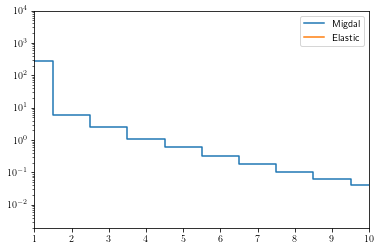

In [7]:
ER_Q = kin.E_R_elastic(c, A, En)*YS(kin.E_R_elastic(c, A, En))
n13, r13 = ion.Si_electron_spectrum(Si_ionization_spectrum, ER_Q,flux=xsec_to_rate)
ne13, re13 = ion.Si_elastic_electron_spectrum_fixed_angle(ER_Q, elastic_rate,start_bin=0,number_of_bins=10)

plt.step(n13, r13, where='mid',label='Migdal')
plt.step(ne13, re13, where='mid',label='Elastic')
plt.legend()
plt.yscale('log')
plt.ylim(1, 1e4)
plt.xlim(0,10)
plt.show()